# Modeling wine quality based on  physicochemical tests

## Exploratory Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import pylab as pl
from sklearn import preprocessing

In [2]:
# Read the csv file into pandas dataframe
red_wines = pd.read_csv('winequality/winequality-red.csv')
print(red_wines.shape)
red_wines.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Check null values
red_wines.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [4]:
# Descriptive statistics
red_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


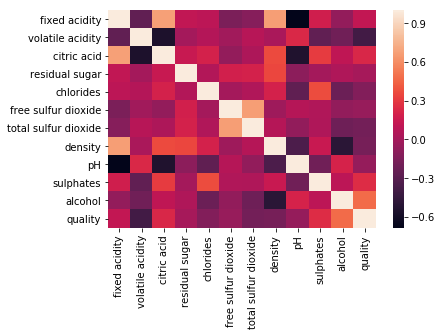

In [5]:
# Correlations
sns.heatmap(red_wines.corr())

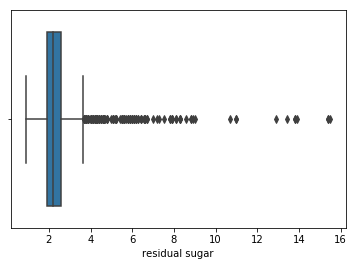

In [6]:
# One outlier example
sns.boxplot(red_wines['residual sugar'])

In [7]:
# Get z scores
z = np.abs(stats.zscore(red_wines))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


In [8]:
# Drop columns below z=3 treshold
red_wines = red_wines[(z < 3).all(axis=1)]
red_wines.shape

(1451, 12)

In [9]:
# Descriptive statistics
red_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


### Data preprocessing

In [10]:
# Define X
X = np.asarray(red_wines.iloc[:,:-1])
X[0:5]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00]])

In [11]:
# Define y
y = np.asarray(red_wines['quality'])
y[0:5]

array([5, 5, 5, 6, 5], dtype=int64)

In [12]:
# Nomalize the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.55292997,  1.05091371, -1.39039974, -0.56543936, -0.25885144,
        -0.44106046, -0.33078419,  0.63548451,  1.37589608, -0.63645843,
        -0.99985592],
       [-0.3099004 ,  2.11933582, -1.39039974,  0.24683241,  0.79082534,
         1.06325489,  0.79047727,  0.05239009, -0.8219512 ,  0.2883529 ,
        -0.6081737 ],
       [-0.3099004 ,  1.40705441, -1.18083057, -0.10128406,  0.50454986,
        -0.01125608,  0.34876821,  0.16900897, -0.3965614 ,  0.05715007,
        -0.6081737 ],
       [ 1.755851  , -1.44207123,  1.54356866, -0.56543936, -0.30656402,
         0.20364612,  0.55263393,  0.75210339, -1.10554439, -0.48232321,
        -0.6081737 ],
       [-0.55292997,  1.05091371, -1.39039974, -0.56543936, -0.25885144,
        -0.44106046, -0.33078419,  0.63548451,  1.37589608, -0.63645843,
        -0.99985592]])

## Validation and Model Selection

### Train/Test Dataset

In [13]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1015, 11) (1015,)
Test set: (436, 11) (436,)


In [14]:
# Train model and predict
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

257 / 436 correct


In [15]:
from sklearn.metrics import accuracy_score

# test set accuracy
accuracy_score(y_test, y_pred)

0.5894495412844036

In [115]:
#train set accuracy
accuracy_score(y_train, knn.fit(X_train, y_train).predict(X_train))

0.7146496815286624

[0.623608017817372, 0.570898292501856, 0.570898292501856, 0.5575352635486266, 0.5597624350408315, 0.5545657015590201, 0.5508537490720119, 0.5605048255382331, 0.5538233110616184, 0.5553080920564217, 0.562731997030438, 0.5605048255382331, 0.5671863400148478, 0.570898292501856, 0.5731254639940608, 0.5798069784706755, 0.5753526354862658, 0.579064587973274, 0.5746102449888641, 0.5842613214550854, 0.5805493689680772, 0.585003711952487, 0.5760950259836675, 0.579064587973274, 0.576837416481069]


Text(0, 0.5, 'Testing Accuracy')

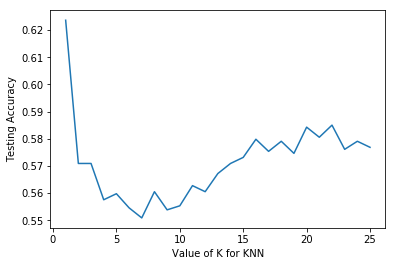

In [116]:
%matplotlib inline

# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [117]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.5382331106161841


C:\Users\Gulden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gulden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [118]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

In [119]:
def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

In [120]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [121]:
degree = np.arange(0, 15)
val_train, val_test = validation_curve(PolynomialRegression(), X, y,
                                       'polynomialfeatures__degree', degree, cv=4,
                                       scoring=rms_error)

KeyboardInterrupt: 

In [ ]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(degree, val_train, label='training scores')
plot_with_err(degree, val_test, label='validation scores')
plt.xlabel('degree'); plt.ylabel('rms error')
plt.legend()